## **Import Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Explore Dataset**

In [ ]:
# path to the dataset directory
base_dir = '/content/drive/MyDrive/Dataset/capstone-dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
# count images in the directory
def count_images_in_directory(directory):
    total_images = 0
    for _, _, filenames in os.walk(directory):
        total_images += len(filenames)
    return total_images

dataset_count = count_images_in_directory(base_dir)
train_count = count_images_in_directory(train_dir)
val_count = count_images_in_directory(val_dir)

print(f"Total dataset: {dataset_count} images")
print(f"Training data: {train_count} images")
print(f"Validation data: {val_count} images")

Total dataset: 1100 images
Training data: 880 images
Validation data: 220 images


In [ ]:
# count images per label in the directory
def count_images_per_label(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            total_images_in_label = len(os.listdir(label_path))
            label_counts[label] = total_images_in_label
    return label_counts

train_label_counts = count_images_per_label(train_dir)
val_label_counts = count_images_per_label(val_dir)

print(f"Total of labels in training data: {len(train_label_counts)}")
for label, count in train_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in validation data: {len(val_label_counts)}")
for label, count in val_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

Total of labels in training data: 11
Label: conjuntivis, Count: 80 images
Label: ear_mites, Count: 80 images
Label: entropion, Count: 80 images
Label: eyelid_lump, Count: 80 images
Label: flea_allergy, Count: 80 images
Label: keratosis, Count: 80 images
Label: leprosy, Count: 80 images
Label: nasal_discharge, Count: 80 images
Label: pyoderma, Count: 80 images
Label: ringworm, Count: 80 images
Label: scabies, Count: 80 images

Total of labels in validation data: 11
Label: conjuntivis, Count: 20 images
Label: ear_mites, Count: 20 images
Label: entropion, Count: 20 images
Label: eyelid_lump, Count: 20 images
Label: flea_allergy, Count: 20 images
Label: keratosis, Count: 20 images
Label: leprosy, Count: 20 images
Label: nasal_discharge, Count: 20 images
Label: pyoderma, Count: 20 images
Label: ringworm, Count: 20 images
Label: scabies, Count: 20 images


In [ ]:
# list files in training data
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis297_jpg.rf.2cfb04bce200a4ac76e184711aa2bbda.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis2_jpg.rf.668956c051cd00aa4909776cc6953f4b.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis266_jpg.rf.8f44f76288f81a2b8ef411a001d72c70.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis267_jpg.rf.b1ef46d74f45118be5285a732ae04360.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis269_jpg.rf.7e8ebb8ff4adca783727adfde09f9fef.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis276_jpg.rf.4cd44d24f9805155f0ccbbc258a32f8e.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis275_jpg.rf.b1bb26519e471629aeaf79e6b272142e.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/train/conjuntivis/conjungivitis257_jpg.rf.9d10a7f0ecd8cb71693b60b

In [ ]:
# list files in validation data
for dirname, _, filenames in os.walk(val_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/images-2024-07-20T211518-936_jpg.rf.063358fc036536e903a31dc391e4e2ac.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/images-2024-07-20T211506-179_jpg.rf.299e6a4ddfd543a719da8932e765d0cd.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/english-bulldog-538485_960_720_jpg.rf.31c1357b0fc7e0c70c0cf180ec241d23.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/conjungivitis43_jpg.rf.81fafcc2c8cba24f05306bde5e11b2cb.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/descarga-27-_jpg.rf.a288278ddbe43b8cf4f3d7b2e9a9fce7.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/descarga-21-_jpg.rf.67e681584f02c834adbbf899db41fcd4.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/validation/conjuntivis/descarga-22-_jpg.rf.74bba1e2ba7bd8d8e5389e1b97903f73.jpg
/content/drive/MyDrive/Dataset/capstone-dataset/val

## **Preprocessing Data**

In [ ]:
# batch size and image size
batch_size = 32
img_height = 224
img_width = 224

# define augmentation and normalization parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

# define normalization parameters for validation and testing data
val_datagen = ImageDataGenerator(
    rescale=1.0/255
  )

# load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123
  )

# load validation data
val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )

Found 880 images belonging to 11 classes.
Found 220 images belonging to 11 classes.


In [ ]:
# get the first batch of images and labels
iterator = iter(train_data)
images, labels = next(iterator)

# display the first batch information
print(f"Shape of batch of images: {images.shape}")
print(f"Shape of batch of labels: {labels.shape}")

Shape of batch of images: (32, 224, 224, 3)
Shape of batch of labels: (32, 11)


Training images with labels:


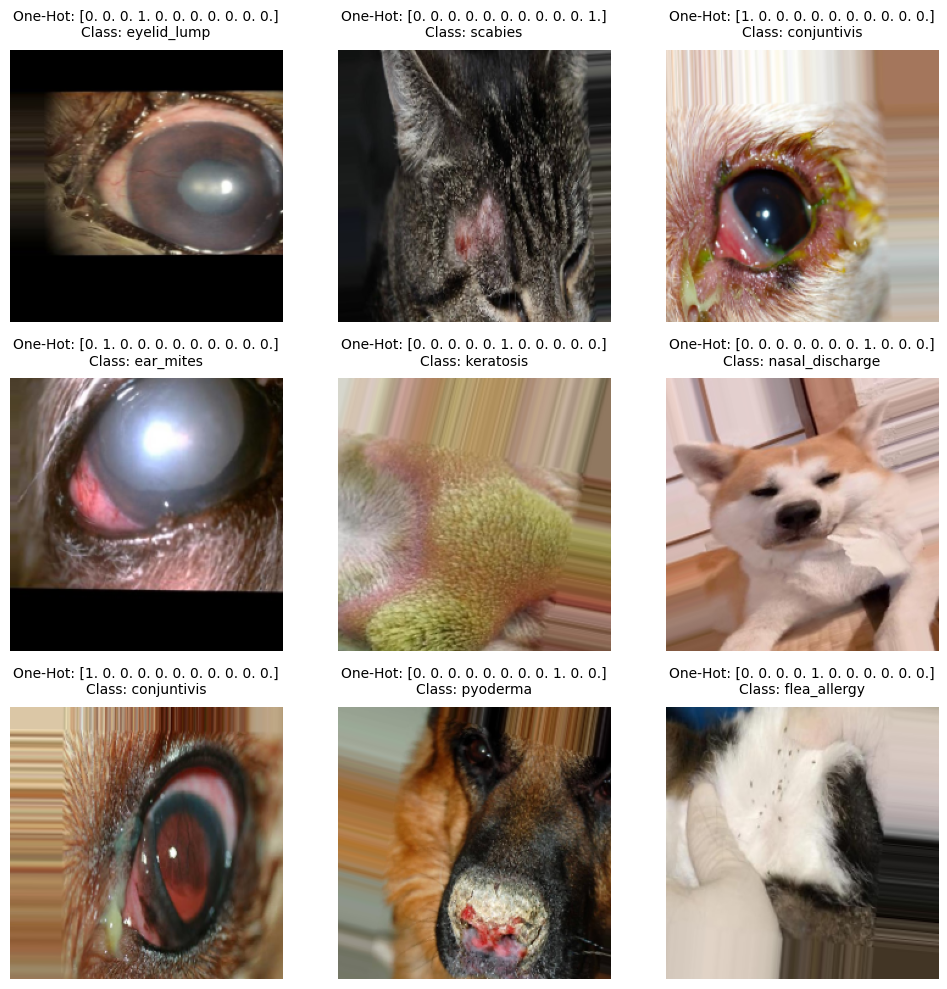


Validation images with labels:


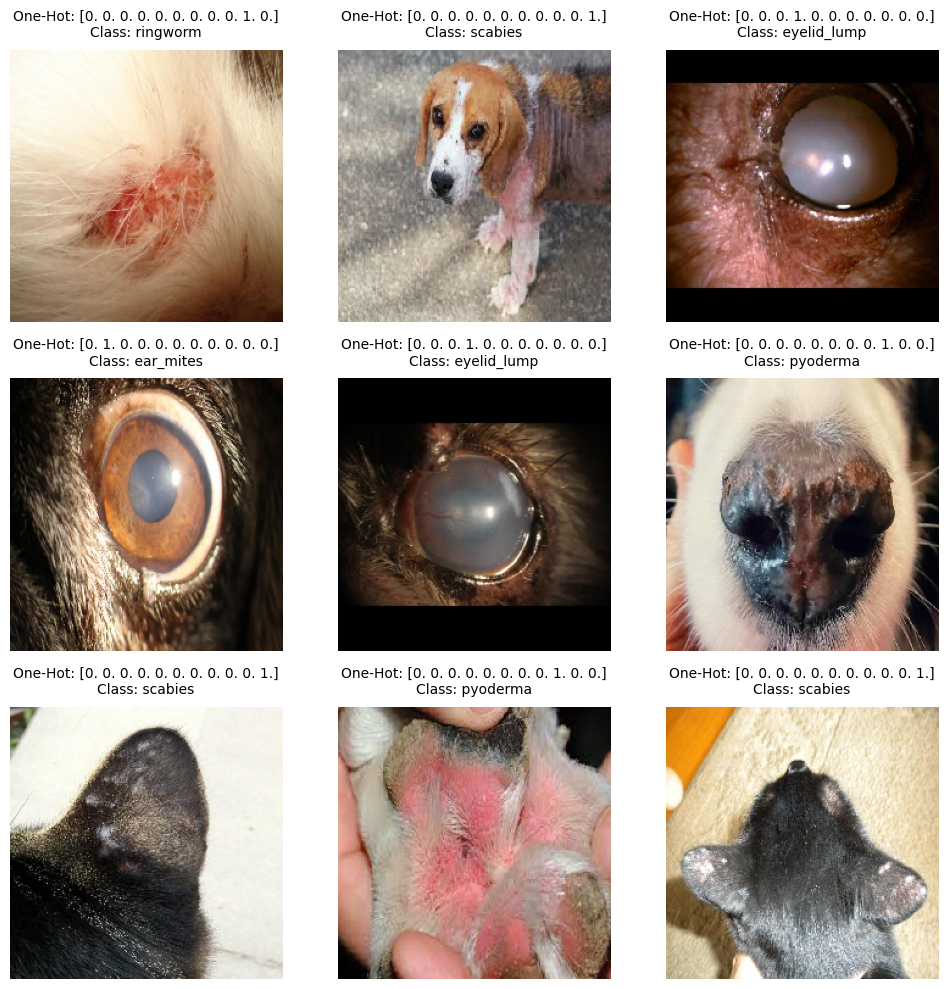

In [ ]:
# display the image along with the label
def display_images_with_labels(data, num_images=9):
    # take the first batch
    images, labels = next(data)

    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # display one-hot encoding
        one_hot_label = labels[i]
        # display the class name based on one-hot encoding
        class_index = np.argmax(one_hot_label)
        class_name = list(data.class_indices.keys())[class_index]

        # combine one-hot encoding and class name
        plt.title(f"One-Hot: {one_hot_label}\nClass: {class_name}", fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

print("Training images with labels:")
display_images_with_labels(train_data)

print("\nValidation images with labels:")
display_images_with_labels(val_data)

## **Modeling**

### **MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load base model MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# fine-tune a few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# custom layers on top of base model
x = base_model.output

# additional CNN layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)

# flattening and dense layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# output layer
output = Dense(11, activation='softmax')(x)

# define model
model = Model(inputs=base_model.input, outputs=output)

# compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 5,570,251 (21.25 MB)

 Trainable params: 5,535,883 (21.12 MB)

 Non-trainable params: 34,368 (134.25 KB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 381s 10s/step - accuracy: 0.1252 - loss: 2.5833 - val_accuracy: 0.1909 - val_loss: 2.3953
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 195s 7s/step - accuracy: 0.2379 - loss: 2.1450 - val_accuracy: 0.3000 - val_loss: 1.9864
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 208s 7s/step - accuracy: 0.3181 - loss: 1.9074 - val_accuracy: 0.3682 - val_loss: 1.6751
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 197s 7s/step - accuracy: 0.4184 - loss: 1.5837 - val_accuracy: 0.4000 - val_loss: 1.5707
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.4894 - loss: 1.4677 - val_accuracy: 0.4455 - val_loss: 1.4240
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.5214 - loss: 1.3597 - val_accuracy: 0.4864 - val_loss: 1.3464
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.5675 - loss: 1.2031 - val_accuracy: 0.5182 - val_loss: 1.2782
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.6414 - loss: 1.0449 - val_accuracy: 0

### **InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load base model MobileNetV2
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# fine-tune a few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# custom layers on top of base model
x = base_model.output

# additional CNN layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)

# flattening and dense layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# output layer
output = Dense(11, activation='softmax')(x)

# define model
model = Model(inputs=base_model.input, outputs=output)

# compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_100 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 111, 111, 32)   │             96 │ conv2d_100[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_101 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_98    │ (None, 109, 109, 32)   │             96 │ conv2d_101[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_102 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_99    │ (None, 109, 109, 64)   │            192 │ conv2d_102[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_103 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_100   │ (None, 54, 54, 80)     │            240 │ conv2d_103[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_104 (Conv2D)  

 Total params: 26,884,523 (102.56 MB)

 Trainable params: 26,849,835 (102.42 MB)

 Non-trainable params: 34,688 (135.50 KB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 476s 16s/step - accuracy: 0.1425 - loss: 2.5529 - val_accuracy: 0.1773 - val_loss: 2.5529
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 441s 16s/step - accuracy: 0.3017 - loss: 2.0308 - val_accuracy: 0.3000 - val_loss: 2.1082
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 427s 15s/step - accuracy: 0.3801 - loss: 1.7444 - val_accuracy: 0.4091 - val_loss: 1.7145
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 426s 15s/step - accuracy: 0.4611 - loss: 1.5533 - val_accuracy: 0.4682 - val_loss: 1.5064
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 463s 16s/step - accuracy: 0.5345 - loss: 1.3562 - val_accuracy: 0.4773 - val_loss: 1.4135
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 439s 16s/step - accuracy: 0.5977 - loss: 1.1738 - val_accuracy: 0.5364 - val_loss: 1.2866
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 442s 16s/step - accuracy: 0.6412 - loss: 1.0359 - val_accuracy: 0.5455 - val_loss: 1.2245
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 435s 15s/step - accuracy: 0.6717 - loss: 0.9344 - val_accu

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most layers
for layer in base_model.layers[:-5]:  # Fine-tune only the last 5 layers
    layer.trainable = False

# Add custom layers
x = base_model.output
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.3)(x)  # Dropout after convolution
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.3)(x)
output = Dense(11, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_291 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_286   │ (None, 111, 111, 32)   │             96 │ conv2d_291[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_292 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_287   │ (None, 109, 109, 32)   │             96 │ conv2d_292[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_293 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_288   │ (None, 109, 109, 64)   │            192 │ conv2d_293[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_21          │ (None, 54, 54, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_294 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_289   │ (None, 54, 54, 80)     │            240 │ conv2d_294[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_295 (Conv2D)  

 Total params: 26,818,347 (102.30 MB)

 Trainable params: 5,015,563 (19.13 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.0995 - loss: 9.1545 - val_accuracy: 0.2182 - val_loss: 7.8681
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.1924 - loss: 7.9556 - val_accuracy: 0.3227 - val_loss: 7.4745
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.2558 - loss: 7.6075 - val_accuracy: 0.3682 - val_loss: 7.1860
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.3603 - loss: 7.2389 - val_accuracy: 0.4091 - val_loss: 6.9616
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.3516 - loss: 6.9992 - val_accuracy: 0.4045 - val_loss: 6.7669
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.3702 - loss: 6.7863 - val_accuracy: 0.4455 - val_loss: 6.5526
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 205s 5s/step - accuracy: 0.4086 - loss: 6.5854 - val_accuracy: 0.4364 - val_loss: 6.4086
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.4552 - loss: 6.3289 - val_accuracy: 0.